<div dir="rtl">
 ابتدا کتابخانه های لازم برای محاسبات عددی و کشیدن نمودار را فراخوانی می کنیم.
</div>

In [11]:
# import libraries
import numpy as np # for linear algebra and scientific computing
import matplotlib.pyplot as plt # for plotting


<div dir="rtl">
    سپس سید برای رندم تعریف میکنیم تا خروجی در اجرا های مختلف نتیجه یکسانی داشته باشد.
</div>

In [12]:
# set seed
np.random.seed(85) 

<div dir="rtl">
    سپس تابع مطلوب سوال برای محاسبه ی مقدار تابع مورد نظر در نقاط مختلف تعریف میکنیم.
</div>

In [13]:
# Define the function y = x^2
def true_function(x):
    return x**2

<div dir="rtl">
    حال کلاس Layer را تعریف میکنیم که در آن تعداد نورون های لایه و وزن های آن ها را ذخیره میکنیم.
    از آن برای ساختن مدل در ادامه استفاده میکنیم.
</div>

In [14]:
# Define the Layer class
class Layer:
    def __init__(self, input_size, output_size): # initialize the weights and biases with random values
        self.weights = np.random.randn(input_size, output_size) 
        # self.bias = np.zeros((1, output_size))
        self.bias = np.random.randn(1, output_size)
        self.input = None
        self.output = None

    def forward(self, input_data): # forward pass
        self.input = input_data
        self.output = np.dot(self.input, self.weights) + self.bias
        return self.output

<div dir="rtl">
    حال کلاس Model را تعریف میکنیم که در آن لایه های مختلف مدل را ذخیره میکنیم.
    از آن برای ساختن مدل در ادامه استفاده میکنیم.
    همچنین در آن توابع مورد نیاز مانند تابع آموزش، پیش بینی، محاسبه خطا و ... را تعریف میکنیم.
</div>

In [15]:
# Define the MLP class
class MLP:
    def __init__(self, input_size, hidden_size, output_size, learning_rate=0.01): # initialize the MLP model
        self.hidden_layer = Layer(input_size, hidden_size)
        self.output_layer = Layer(hidden_size, output_size)
        self.learning_rate = learning_rate

    def relu(self, x): # ReLU activation function
        return np.maximum(0, x)

    def mean_squared_error(self, y_true, y_pred): # mean squared error loss function
        return np.mean(np.square(y_true - y_pred))

    def train(self, x_train, y_train, num_epochs=5000): # train the MLP model
        for epoch in range(num_epochs): # loop over the number of epochs
            # Forward pass
            hidden_output = self.relu(self.hidden_layer.forward(x_train)) # hidden layer output
            output = self.output_layer.forward(hidden_output) # output layer output

            # Calculate loss
            loss = self.mean_squared_error(output, y_train) # mean squared error loss

            # Backpropagation to calculate gradients
            grad_output = 2 * (output - y_train) / output.shape[0] # gradient of loss w.r.t. output layer output
            grad_weights2 = np.dot(hidden_output.T, grad_output) # gradient of loss w.r.t. output layer weights
            grad_bias2 = np.sum(grad_output, axis=0, keepdims=True) # gradient of loss w.r.t. output layer bias
            grad_hidden = np.dot(grad_output, self.output_layer.weights.T) # gradient of loss w.r.t. hidden layer output
            grad_hidden[self.hidden_layer.output <= 0] = 0 # gradient of loss w.r.t. hidden layer output
            grad_weights1 = np.dot(x_train.T, grad_hidden) # gradient of loss w.r.t. hidden layer weights
            grad_bias1 = np.sum(grad_hidden, axis=0, keepdims=True) # gradient of loss w.r.t. hidden layer bias

            # Update weights and biases using gradient descent
            self.output_layer.weights -= self.learning_rate * grad_weights2
            self.output_layer.bias -= self.learning_rate * grad_bias2
            self.hidden_layer.weights -= self.learning_rate * grad_weights1
            self.hidden_layer.bias -= self.learning_rate * grad_bias1

            if (epoch + 1) % 500 == 0: # print loss after every 500 epochs
                print(f'Epoch [{epoch + 1}/{num_epochs}], Training Loss: {loss:.4f}')

    def predict(self, x_test): # predict the output for test data
        hidden_output = self.relu(self.hidden_layer.forward(x_test))
        predicted = self.output_layer.forward(hidden_output)
        return predicted

<div dir="rtl">
    حال داده های آموزش را با تابعی که در ابتدا تعریف کرده ایم میسازیم.
</div>

In [16]:
# Generate training data in the range [-3, 3]
x_train = np.linspace(-3, 3, 850).reshape(-1, 1) 
y_train = true_function(x_train) 

<div dir="rtl">
    حال مدل را با تعداد لایه های مورد نظر میسازیم.
    آن را آموزش می دهیم و بعد از آن برای پیش بینی مقادیر تست استفاده میکنیم.
</div>

In [17]:
# Create an instance of the MLP model
model = MLP(input_size=1, hidden_size=10, output_size=1)

# Train the model
model.train(x_train, y_train)

# Test data for plotting
x_test = np.linspace(-3, 3, 100).reshape(-1, 1)
predicted_test = model.predict(x_test)

# print Test data loss
print(f'Test data loss: {model.mean_squared_error(predicted_test, true_function(x_test)):.4f}')

Epoch [500/5000], Training Loss: 0.1156
Epoch [1000/5000], Training Loss: 0.0649
Epoch [1500/5000], Training Loss: 0.0455
Epoch [2000/5000], Training Loss: 0.0335
Epoch [2500/5000], Training Loss: 0.0255
Epoch [3000/5000], Training Loss: 0.0201
Epoch [3500/5000], Training Loss: 0.0163
Epoch [4000/5000], Training Loss: 0.0137
Epoch [4500/5000], Training Loss: 0.0118
Epoch [5000/5000], Training Loss: 0.0104
Test data loss: 0.0113


<div dir="rtl">
    در نهایت نمودار مقادیر پیش بینی شده را رسم میکنیم.
    و آن ها را با مقادیر واقعی محاسبه میکنیم.
</div>

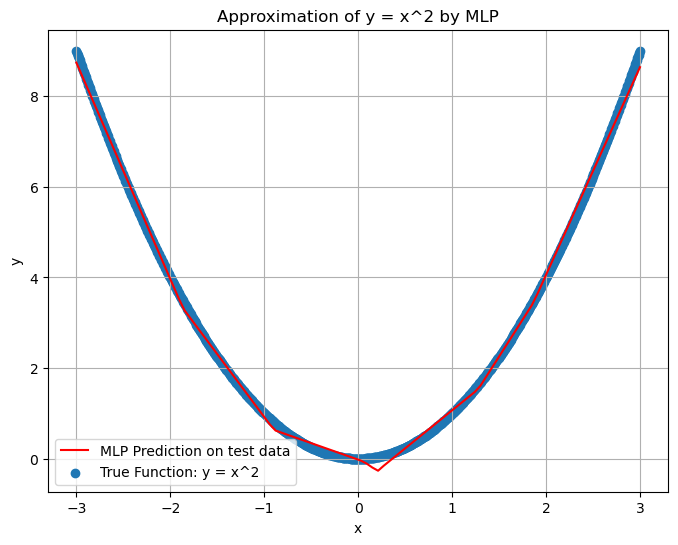

In [18]:
# Plotting the results
plt.figure(figsize=(8, 6))
plt.title('Approximation of y = x^2 by MLP')
plt.xlabel('x')
plt.ylabel('y')
plt.scatter(x_train, y_train, label='True Function: y = x^2')
plt.plot(x_test, predicted_test, color='red', label='MLP Prediction on test data')
plt.legend()
plt.grid(True)
plt.show()


<div dir="rtl">
    همان طور که میبینیم مدل ما مقادیر واقعی را تا حد خوبی پیش بینی میکند.
    همچنین ضرر(loss) 
    مدل ما هم به صورت محسوسی کاهش پیدا کرده است.
</div>